In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df =pd.read_csv("C:/Users/hp/Downloads/iris.data")

# 1.HANDLE DATA

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.isnull().isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
y = df['variety'].values
X = df.drop('variety', axis=1).values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=40)

# 2.SIMILARITY 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30) 

knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test) 
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9666666666666667


In [10]:
n_neighbors=16
scores=[]
for k in range(1,16):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 1.0
Accuracy for k= 2 is: 1.0
Accuracy for k= 3 is: 1.0
Accuracy for k= 4 is: 1.0
Accuracy for k= 5 is: 1.0
Accuracy for k= 6 is: 0.97
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 0.97
Accuracy for k= 10 is: 0.93
Accuracy for k= 11 is: 0.93
Accuracy for k= 12 is: 0.9
Accuracy for k= 13 is: 0.93
Accuracy for k= 14 is: 0.93
Accuracy for k= 15 is: 0.9


In [11]:
from scipy.spatial import distance
a = df['petal.length'].values
b = df['sepal.length'].values
d = distance.euclidean(a, b)
print("Euclidean distance: ",d)

Euclidean distance:  28.966187184370675


In [12]:
from scipy.spatial import distance
a = df['sepal.width'].values
b = df['petal.width'].values
d = distance.euclidean(a, b)
print("Euclidean distance: ",d)

Euclidean distance:  25.864067738853453


In [13]:
import math
def euclideanDistance(instance1, instance2, length): 
    c = np.array([a-b for a, b in zip(instance1, instance2)])
    return math.sqrt((c*c).sum())

In [14]:
data1 = np.array([2, 2, 2])

data2 = np.array([4, 4, 4])

distance = euclideanDistance(data1, data2, 3)

print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


# 3. Neighbors

In [15]:
import operator
def getNeighbors(trainingSet, testInstance, k):

    distances = []

    length = len(testInstance)-1

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet[x], length)

        distances.append((trainingSet[x], dist))

        distances.sort(key=operator.itemgetter(1))

        neighbors = []

    for x in range(k):

        neighbors.append(distances[x][0])

    return neighbors



trainSet = [[2, 2, 2], [4, 4, 4]]

testInstance = [5, 5, 5]

k = 2

neighbors = getNeighbors(trainSet, testInstance, k)

print(neighbors)

[[4, 4, 4], [2, 2, 2]]


# 4. Response

In [16]:
import operator

def getResponse(neighbors):

    classVotes = {}

    for x in range(len(neighbors)):

        response = neighbors[x][ -1 ] 

        if response in classVotes:
            classVotes[response]+=1
        else :
            classVotes[response]=1
            
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

    return sortedVotes[0][0]

In [17]:
classVtes = getResponse(neighbors)
classVtes

4

In [18]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


# 5.Accuracy

In [19]:
 from sklearn.metrics import confusion_matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

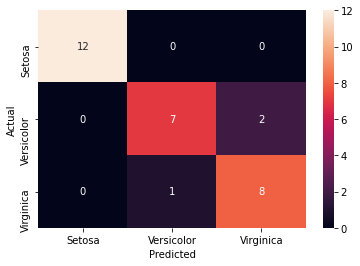

In [20]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [21]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0   

In [22]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


# 6.Main

In [23]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    handleDataset(r'C:\Users\Desktop\Iris dataset\iris.txt', split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getKNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy=getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

NameError: name 'handleDataset' is not defined

# 7. Another distance metric

In [24]:
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))
 
#define vectors
A = df['petal.length'].values
B = df['sepal.length'].values

#calculate Manhattan distance between vectors
manhattan(A, B)

312.79999999999984